<a href="https://colab.research.google.com/github/supon/Example-Project-Repository/blob/main/3_VAJA9_AIForThai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ระบบสังเคราะห์เสียงพูดภาษาไทย (วาจา: VAJA)

Vaja หรือ วาจา คือ "ระบบสังเคราะห์เสียงพูดภาษาไทย" หรือบางทีเรียกว่า ระบบแปลงข้อความภาษาไทยให้เป็นเสียงพูด โดยทีมวิจัยการเข้าใจเสียงและข้อความ (Speech and text understanding, STU) เวอร์ชันล่าสุดคือ วาจาเวอร์ชัน 9.0 ซึ่งเป็นผลงานล่าสุดที่เราได้ออกแบบและพัฒนาขึ้นมา เพื่อเป็นผู้ช่วยเหล่าเมกเกอร์และนักพัฒนาซอฟต์แวร์ในการสร้างไลบรารี (Library)

# ฟีเจอร์ที่สำคัญ


1.   เสียงสังเคราะห์เลือกได้ 4 เสียง ได้แก่ เสียงภูมิ(ผู้ชาย), เสียงน้ำผึ้ง(ผู้หญิง), เสียงพ๊อพ(เด็กผู้ชาย), เสียงพิม(เด็กผู้หญิง)
2.   ข้อความระบุได้ทั้งแบบรูปเขียน (grapheme) และรูปเสียง (phoneme)
3.   เลือกได้ว่าจะให้โมเดลเว้นวรรคให้ หรือผู้ใช้เว้นวรรคเอง
3.   ผลลัพธ์แสดงได้ทั้งเสียง และภาพ โดยสามารถใช้งานร่วมกับโมเดล 3 มิติที่รองรับ ARKit Blendshape หรือ VRM Blendshape  เช่นโมเดลจาก [ReadyPlayerMe](https://readyplayer.me/) และ [VRoid](https://vroid.com/en)



# การสังเคราะห์เสียงผู้ชาย, ผู้หญิง, เด็กผู้ชาย และเด็กผู้หญิง

1. ระบุ API-Key
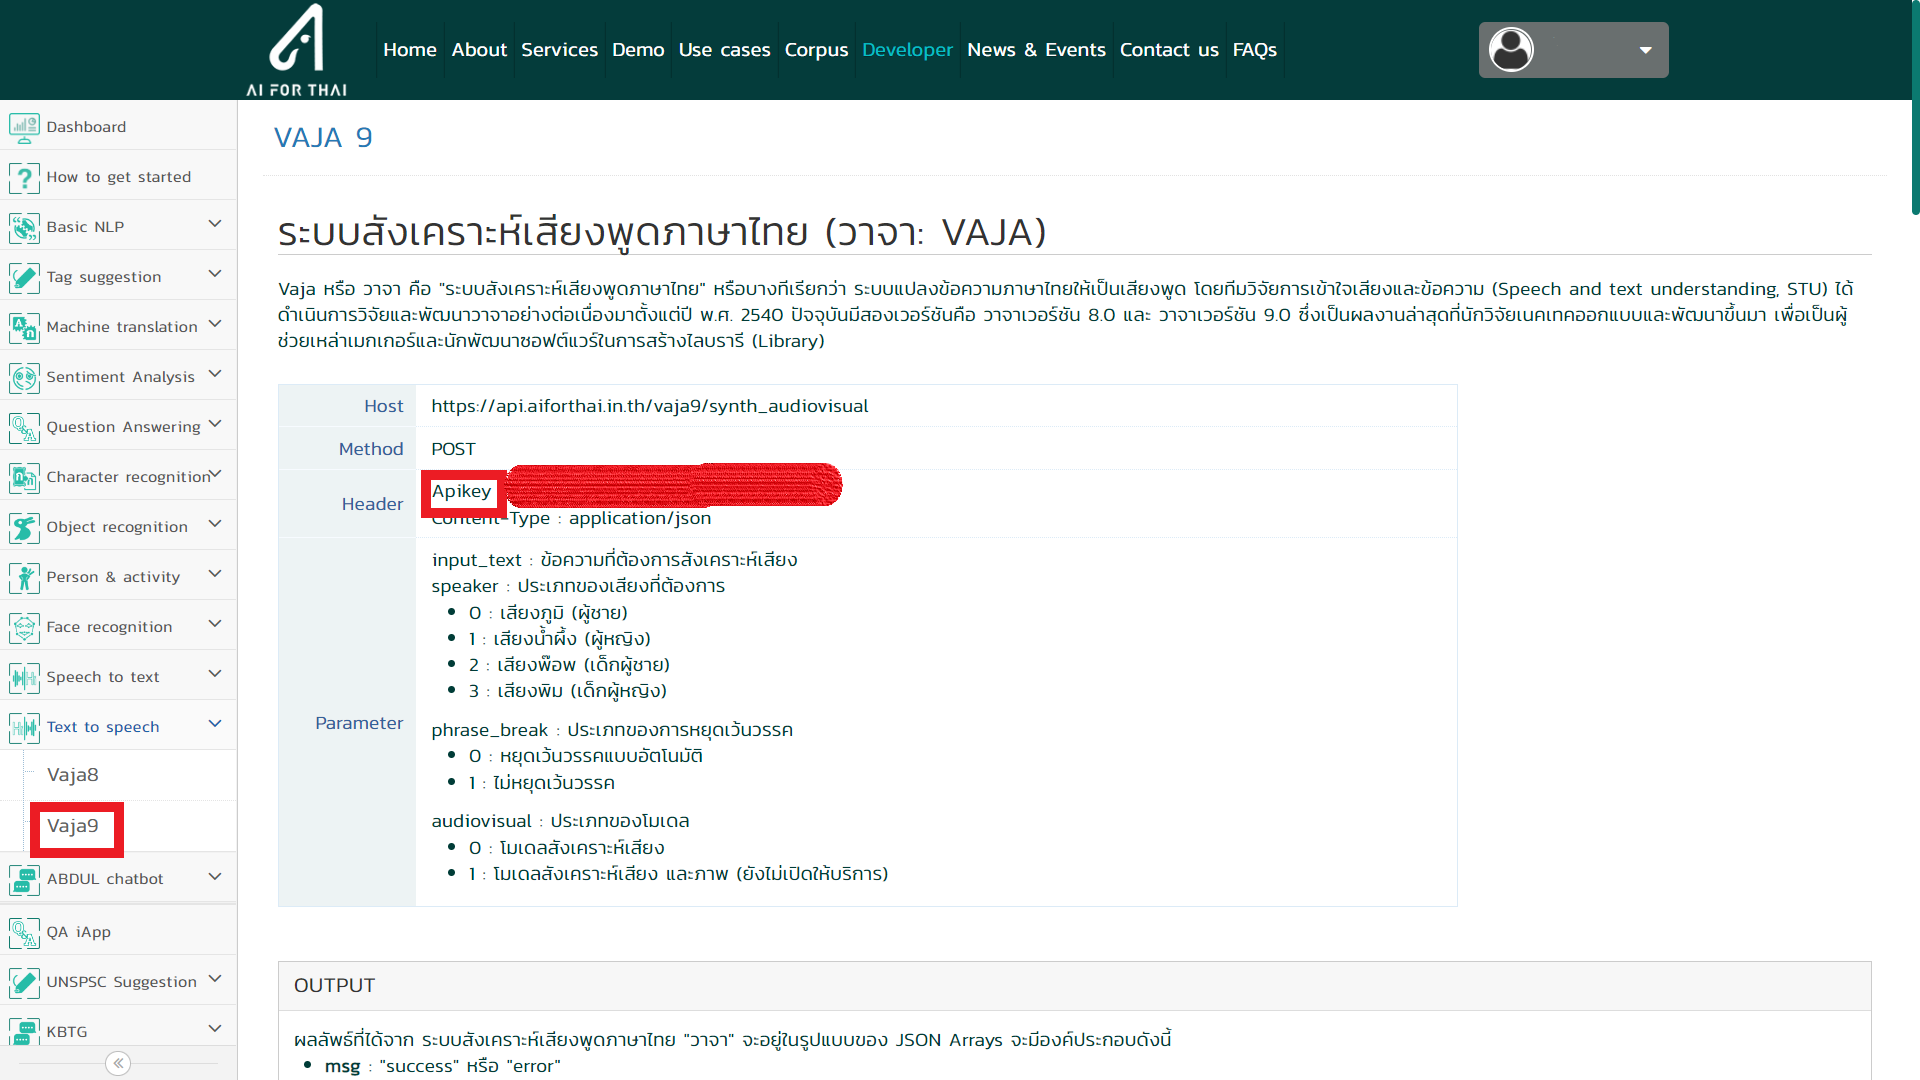

In [ ]:
Apikey = input("Enter your Apikey:")

print(f'You entered {Apikey}:')

2. ระบุ Vaja9 API

In [ ]:
url = 'https://api.aiforthai.in.th/vaja9/synth_audiovisual'

3. ระบุข้อความที่ต้องการสร้างเสียงสังเคราะห์

In [ ]:
text = input("Enter what you want to say:")

4. เลือกเสียงที่ต้องการ

In [ ]:
from ipywidgets import Select, HBox, Label
from IPython.display import display

supported_voice_gen = ["Phoom (male)", "NamPhueng (female)", "Pop (boy)", "Pim (girl)"]

print("Select the voice that you want to use.")
voice_select = Select(options=supported_voice_gen, value=None)
display(HBox([voice_select]))


In [ ]:
speaker = voice_select.index
speaker_type = voice_select.value
if speaker is None:
  speaker = -1
  speaker_type = "robot"
print("speaker("+speaker_type+"): "+str(speaker))

5. สังเคราะห์เสียงพูด

In [ ]:
import requests
headers = {'Apikey':Apikey,"Content-Type": "application/json"}
data = {'input_text':text,'speaker': speaker}
response = requests.post(url, json=data, headers=headers)
print(response.json())

6. ดาวน์โหลดผลลัพธ์ และฟังเสียง

In [ ]:
import IPython

def download_and_play(sWav_url):
  with open('test.wav', 'wb') as a:
      resp = requests.get(sWav_url,headers={'Apikey':Apikey})
      if resp.status_code == 200:
          a.write(resp.content)
          print('Downloaded: '+response.json()['wav_url'])
          IPython.display.display(IPython.display.Audio('test.wav'))
      else:
          print(resp.reason)
          exit(1)



In [ ]:
if(response.json()['msg'] == 'success'):
  download_and_play(response.json()['wav_url'])

# การสังเคราะห์เสียง ที่เว้นวรรคแบบอัตโนมัติ และกำหนดเอง

In [ ]:
text = 'ทดสอบข้อความที่ต้องการสังเคราะห์เสียงโดยให้โปรแกรมเว้นวรรคแบบอัตโนมัติ'

# ทำการเว้นวรรคแบบอัตโนมัติ
iPhrase_break=0

data = {'input_text':text,'speaker': 0, 'phrase_break':iPhrase_break, 'audiovisual':0}

response = requests.post(url, json=data, headers=headers)

print(response.json())

if(response.json()['msg'] == 'success'):
  download_and_play(response.json()['wav_url'])

In [ ]:
text = 'ทดสอบข้อความที่ต้องการสังเคราะห์เสียงโดยให้โปรแกรมไม่มีการเว้นวรรคแบบอัตโนมัติ'

# ทำการเว้นวรรคแบบแมนนวล โดยระบุพารามิเตอร์ iPhrase_break=1
iPhrase_break=1

data = {'input_text':text,'speaker': 0, 'phrase_break':iPhrase_break, 'audiovisual':0}

response = requests.post(url, json=data, headers=headers)

print(response.json())

if(response.json()['msg'] == 'success'):
  download_and_play(response.json()['wav_url'])

In [ ]:
text = 'ทดสอบข้อความที่ต้องการสังเคราะห์เสียง{sp}โดยให้โปรแกรมไม่มีการเว้นวรรคแบบอัตโนมัติ{sp}แต่สามารถแทรกรูปเสียง {sp} ที่ต้องการเว้นวรรค'

# ทำการเว้นวรรคแบบแมนนวล โดยระบุพารามิเตอร์ iPhrase_break=1 และแทรก {sp} ตรงจุดที่ต้องการเว้นวรรค
iPhrase_break=1

data = {'input_text':text,'speaker': 0, 'phrase_break':iPhrase_break, 'audiovisual':0}

response = requests.post(url, json=data, headers=headers)

print(response.json())

if(response.json()['msg'] == 'success'):
  download_and_play(response.json()['wav_url'])

# การสังเคราะห์เสียงแบบระบุข้อความที่ใช้รูปเขียน(graphemes) และรูปเสียง(phonemes)

In [ ]:
# การระบุรูปเสียงให้ระบุ phones ที่ต้องการ ให้อยู่ภายในวงเล็บแบบปีกกา
text = 'นี่คือการ {th o3 t^ s @@1 p^ sp}วาจาเวอร์ชันใหม่ ที่สามารถป้อนได้ทั้งรูปเขียน และรูปเสียง'

data = {'input_text':text,'speaker': 0, 'phrase_break':0, 'audiovisual':0}

response = requests.post(url, json=data, headers=headers)

print(response.json())

if(response.json()['msg'] == 'success'):
  download_and_play(response.json()['wav_url'])

# การสังเคราะห์เสียง และภาพ
พบกับตัวอย่างการใช้งานร่วมกับโมเดล 3 มิติที่ทุกคนสามารถสร้างอวทาร์ของตนเองจากรูปเพียง 1 รูป จาก ReadyPlayerMe หรือ VROID Model ได้ที่ https://aiforthai.in.th/service_ts.php

โดยภาพนี้แสดงตัวอย่างการสร้าง virtual assistant (Sontana-สนทนา) จากบริการ Partii, ABDUL และ VAJA ร่วมกับโมเดลจาก ReadyPlayerMe
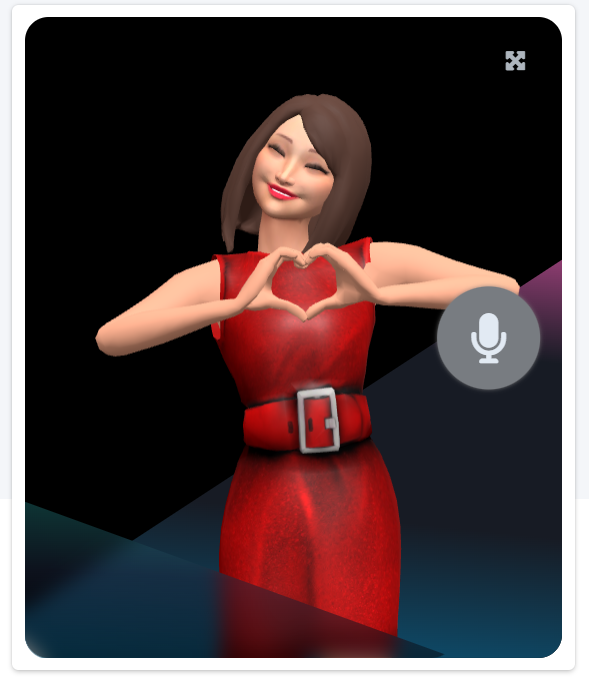